PROJEKT 2

In [36]:
import math 
import time
import matplotlib.pyplot as plt

In [9]:
def display_matrix(matrix, size):
    for i in range(size):
        for j in range(size):
            print(matrix[i][j], end=' ')
        print('\n')
            

Stałe

In [10]:
e = 9.0
N = 915
a1 = 5.0 + e
a2 = -1.0
a3 = -1.0

Tworzenie macierzy A

In [11]:
def create_matrix(N, a1, a2, a3):
    rows, cols = (N, N)
    A = [[0.0 for i in range(cols)] for j in range(rows)]

    for i in range(N):
        A[i][i] = a1
        if i + 1 < N:
            A[i][i+1] = a2
        if i + 2 < N:
            A[i][i+2] = a3

        if i - 1 >= 0:
            A[i][i-1] = a2
        if i - 2 >= 0:
            A[i][i-2] = a3
    return A

In [12]:
A = create_matrix(N, a1, a2, a3)

Tworzenie wektora b

In [13]:
b = [0 for i in range(N)]
f = 4

for i in range(N):
    b[i] = math.sin(i*(f + 1))

zad. 2
Obliczenia wg wzoru:

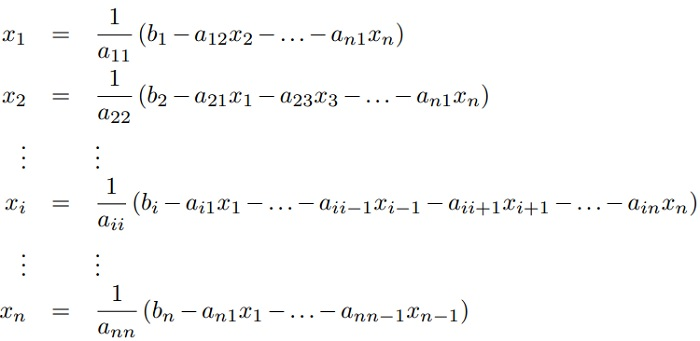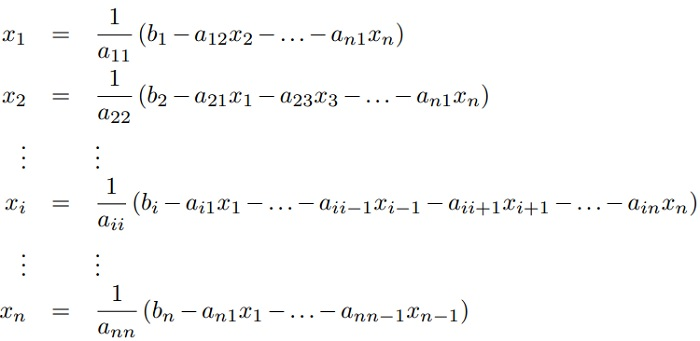


Funkcja obliczająca metodą Jacobiego:
- curr_x - kopia aktualnego x, ze względu na modyfikacje x w pętli
- norma: 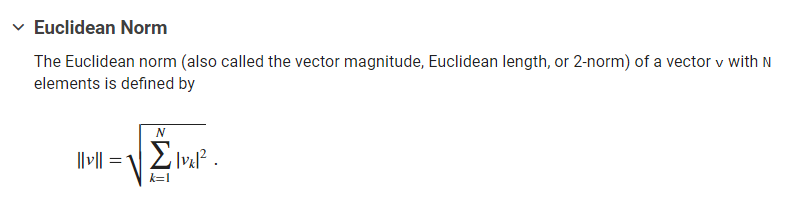


In [14]:
def get_vector_norm_euklides(v):
    N = len(v)
    ret = 0
    for i in range(N):
        ret += v[i]*v[i]
    return math.sqrt(ret)

In [15]:
def multiply_matrix(A, x):
    N = len(x)
    ret = [0.0 for i in range(N)]
    
    for i in range(N):
        sum = 0.0
        for j in range(N):
            sum += A[i][j] * x[j]
        ret[i] = sum
    return ret

In [16]:
def substract_vectors(a, b):
    N = len(a)
    for i in range(N):
        a[i] -= b[i]
    return a

In [17]:
# Ax = b
def get_vector_residuum(A, x, b):
    N = len(x)
    Ax = multiply_matrix(A, x) #wektor o rozmiarze N  
    residuum = substract_vectors(Ax, b) # wektor o rozmiarze N
    return residuum

In [26]:
def get_vector_norm(A, x, b):
    N = len(x)
    residuum = get_vector_residuum(A, x, b)
    norm = get_vector_norm_euklides(residuum)
    #print("norma = " + str(norm))
    return norm 

In [27]:
def solve_jacobi(A, b, epsilon):
    N = len(b)
    x = [0.0 for i in range(N)]  # macierz X, na wynik
    x_prev = [1.0 for i in range(N)]  # początkowe "wyniki"

    k = 0
    # print("epsilon: " + str(epsilon))
    start = time.time()
    
    while get_vector_norm(A, x, b) > epsilon:
        for i in range(N):
            x[i] = b[i]

            for j in range(N):
                if i != j:
                    x[i] -= A[i][j] * x_prev[j]
            x[i] /= A[i][i]

        x_prev = x.copy()
        k += 1
    # end = time.time()
    # print("czas wykonania: " + str(end - start) + "s")
    #print("liczba iteracji: " + str(k))    
    return x

In [19]:
jac = solve_jacobi(A, b, pow(10, -9))

epsilon: 1e-09
norma = 21.384473416735254
norma = 86.3625809047604
norma = 24.64974933570051
norma = 7.038155349261883
norma = 2.0098149031126695
norma = 0.5739609938612484
norma = 0.16391885550874827
norma = 0.046815604943892995
norma = 0.013371013538428353
norma = 0.0038189832404037323
norma = 0.0010907853552703493
norma = 0.00031155717301286034
norma = 8.899019987928162e-05
norma = 2.5418612357491103e-05
norma = 7.2604931609332244e-06
norma = 2.073884357276341e-06
norma = 5.92388571455784e-07
norma = 1.6921239786230125e-07
norma = 4.833489308631727e-08
norma = 1.3806772520399967e-08
norma = 3.9439024778674244e-09
norma = 1.1265814303455648e-09
norma = 3.218113789384394e-10
czas wykonania: 13.136632680892944s
liczba iteracji: 22


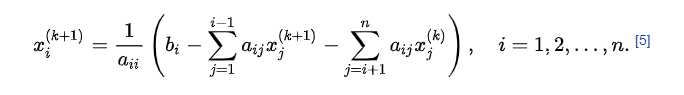

In [28]:
def solve_gauss_seidel(A, b, epsilon):
    N = len(b)
    x = [1.0 for i in range(N)]
    x_prev = [1.0 for i in range(N)]
    
    k = 0
    #print("epsilon: " + str(epsilon))
    start = time.time()
    
    while get_vector_norm(A, x, b) > epsilon:
        for i in range(N):
            triangle_sum = 0

            # macierz trójkątna górna
            for j in range(i):
                triangle_sum += A[i][j] * x[j]
                
            # macierz trójkątna dolna
            for j in range(i + 1, N):
                triangle_sum += A[i][j] * x_prev[j]

            x[i] = (b[i] - triangle_sum) / A[i][i]
            x_prev = x.copy()
        k += 1
        
    end = time.time()
    #print("czas wykonania: " + str(end - start) + "s")
    #print("liczba iteracji: " + str(k))      
    return x

In [21]:
gau = solve_gauss_seidel(A, b, pow(10, -9))

epsilon: 1e-09
norma = 303.4769389078491
norma = 50.436837391861395
norma = 8.39253063017641
norma = 1.3972768660830874
norma = 0.23267129223825367
norma = 0.038745834253573724
norma = 0.006452592993771786
norma = 0.0010746208777309182
norma = 0.0001789680379060646
norma = 2.9805645817500467e-05
norma = 4.963926558255243e-06
norma = 8.267083848596229e-07
norma = 1.3768270359166436e-07
norma = 2.2930183188989988e-08
norma = 3.818881043534688e-09
norma = 6.360110564519612e-10
czas wykonania: 7.284369707107544s
liczba iteracji: 15


Porównanie czasu trwania algorytmów:
- jacobi: ~6s
- gauss-seidel: ~3.5s
Algorytm Gaussa Seidela rozwiązał równanie szybciej od algorytmu Jacobiego o 2.5s (jest 0,42x szybszy)

ZADANIE C

In [22]:
A = create_matrix(N, 3, -1, -1)

In [23]:
jac = solve_jacobi(A, b, pow(10, -9))

epsilon: 1e-09
norma = 21.384473416735254
norma = 40.945050108768896
norma = 53.62470937500312
norma = 71.37475372570134
norma = 95.12425243463389
norma = 126.79143163680094
norma = 169.00458671200582


KeyboardInterrupt: 

In [24]:
gau = solve_gauss_seidel(A, b, pow(10, -9))

epsilon: 1e-09
norma = 36.988439400530865
norma = 60.832097892516686
norma = 120.23202850889238
norma = 240.0386891948221
norma = 479.47036235297304
norma = 957.7952778468476
norma = 1913.3766207868346
norma = 3822.4415357287357


KeyboardInterrupt: 

Wniosek: nie zbiegają się

zad. D
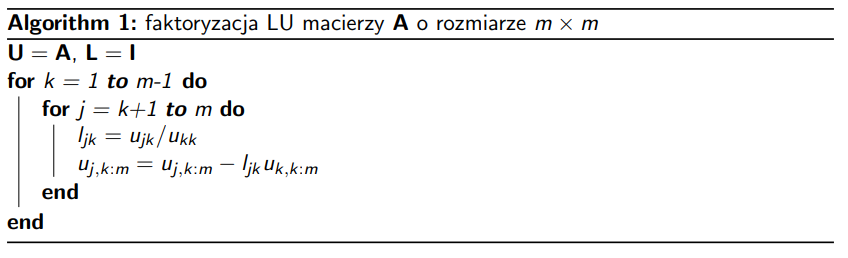

In [29]:
def solve_LU_factor(A, b):
    N = len(b)
    x = [1.0 for i in range(N)]
    
    L = A.copy()
    U = create_matrix(N, 1, 0, 0)
    
    start = time.time()
    
    # L*U*x = b
    #print("liczenie L i U")
    for i in range(N - 1):
        for j in range(i + 1, N):
            L[j][i] = U[j][i] / U[i][i]
            
            for k in range(i, N):
                U[j][k] = U[j][k] - L[j][i] * U[i][k]
    
    # Ly = b, macierz trójkątna górna, podstawianie wprzód
    #print("trójkąt góra")
    y = [0.0 for i in range(N)]
    
    for i in range(N):
        Ly = 0
        for j in range(i):
            Ly += L[i][j] * y[j]
        y[i] = (b[i] - Ly) / L[i][i]
        
    # Ux = y, macierz trójkątna dolna, podstawianie wstecz
    #print("trójkąt dół")
    for i in reversed(range(0, N - 1)):
        Ux = 0
        for j in range(i + 1, N):
            Ux += U[i][j] * x[j]
        x[i] = (y[i] - Ux) / U[i][i]
    
    end = time.time()
    #print("czas wykonania: " + str(end - start) + "s")
    get_vector_norm(A, x, b)
    return x
    

In [39]:
solve_LU_factor(A, b)

liczenie L i U
trójkąt góra
trójkąt dół
czas wykonania: 135.42630124092102s
norma = 11.68793985798178


ZADANIE E

In [33]:
it = [100, 500, 1000, 2000, 3000]
jacobi_time =  [0.0 for i in range(5)]
gauss_time =  [0.0 for i in range(5)]
LU_time =  [0.0 for i in range(5)]

epsilon = pow(10, -9)  

jacobi

In [34]:
i = 0
for n in it:
    A = create_matrix(n, a1, a2, a3)
    b = [1.0 for i in range(n)]
    
    start = time.time()
    solve_jacobi(A, b, epsilon)
    end = time.time()
    jacobi_time[i] = end - start
    
    print(jacobi_time[i])
    
    i += 1

0.07393026351928711
1.6323909759521484
9.042420148849487
32.46504187583923
67.48986792564392


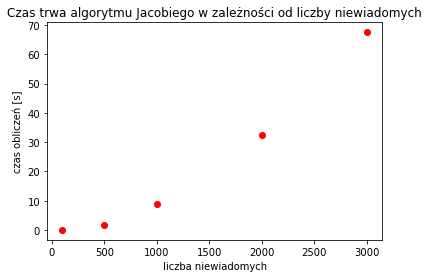

In [40]:
plt.plot(it, jacobi_time, 'ro')
plt.title('Czas trwa algorytmu Jacobiego w zależności od liczby niewiadomych')
plt.ylabel('czas obliczeń [s]')
plt.xlabel('liczba niewiadomych')
plt.show()

gauss

In [45]:
i = 0
for n in it:
    A = create_matrix(n, a1, a2, a3)
    b = [1.0 for i in range(n)]
    
    start = time.time()
    solve_gauss_seidel(A, b, epsilon)
    end = time.time()
    gauss_time[i] = end - start
    
    print(gauss_time[i])
    
    i += 1

0.07755517959594727
0.9151132106781006
3.7536559104919434
14.981579303741455
37.84542536735535


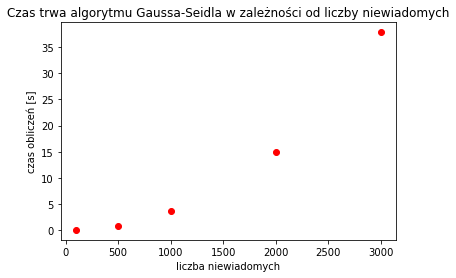

In [46]:
plt.plot(it, gauss_time, 'ro')
plt.title('Czas trwa algorytmu Gaussa-Seidla w zależności od liczby niewiadomych')
plt.ylabel('czas obliczeń [s]')
plt.xlabel('liczba niewiadomych')
plt.show()

LU

In [49]:
i = 0
for n in it:
    A = create_matrix(n, a1, a2, a3)
    b = [1.0 for i in range(n)]
    
    start = time.time()
    solve_LU_factor(A, b)
    end = time.time()
    LU_time[i] = end - start
    
    print(LU_time[i])
    
    i += 1

0.09384298324584961
9.375661373138428
79.0423583984375
641.7987179756165
2212.045578479767


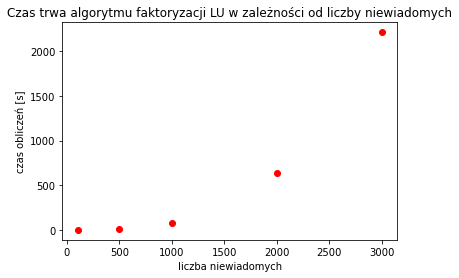

In [50]:
plt.plot(it, LU_time, 'ro')
plt.title('Czas trwa algorytmu faktoryzacji LU w zależności od liczby niewiadomych')
plt.ylabel('czas obliczeń [s]')
plt.xlabel('liczba niewiadomych')
plt.show()